# Postdam PM2.5 Traditional Forcasting

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [2]:
# pip install pmdarima

In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [2]:
# import src
import model_base as mb
import traditional as td

## Data Exploration

* Load Data


In [3]:
df= mb.get_cleaned_datetime_df()
# Set Index
df['Start'] = pd.to_datetime(df['Start'])
mb.set_start_index(df, 'Start')
df.head()

,Start_Timestamp,End_Timestamp,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1356998400,1357002000,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
2013-01-01 01:00:00,1357002000,1357005600,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2013-01-01 02:00:00,1357005600,1357009200,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 03:00:00,1357009200,1357012800,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 04:00:00,1357012800,1357016400,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


# ARIMA

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
ARIMA(p,d,q) are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.


In [ ]:
## Auto Arima Forecasting in Python
In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [ ]:
# hyperparamater tuning for Arimax

auto_arima_model = td.init_auto_model(df)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=393448.845, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=740582.966, Time=0.65 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=1.32 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=632797.600, Time=3.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=393424.849, Time=7.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=393632.851, Time=1.99 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=393424.462, Time=14.66 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=393423.349, Time=2.58 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=393425.303, Time=5.37 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=393422.388, Time=13.55 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=391932.102, Time=63.30 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=393347.087, Time=6.56 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=391922.187, Time=77.62 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=393192.004, Time=7.55 sec
 ARIMA(7

##  Model Creation and Evolve


Training set size: 52588
Validation set size: 17529
Test set size: 17531


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37365D+00    |proj g|=  1.25910D+00

At iterate    5    f=  2.14358D+00    |proj g|=  1.47200D-01

At iterate   10    f=  1.99137D+00    |proj g|=  1.50360D-01

At iterate   15    f=  1.98090D+00    |proj g|=  9.76239D-02

At iterate   20    f=  1.97430D+00    |proj g|=  1.27161D-02

At iterate   25    f=  1.97401D+00    |proj g|=  2.08919D-03

At iterate   30    f=  1.97401D+00    |proj g|=  1.18465D-03

At iterate   35    f=  1.97399D+00    |proj g|=  1.36795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

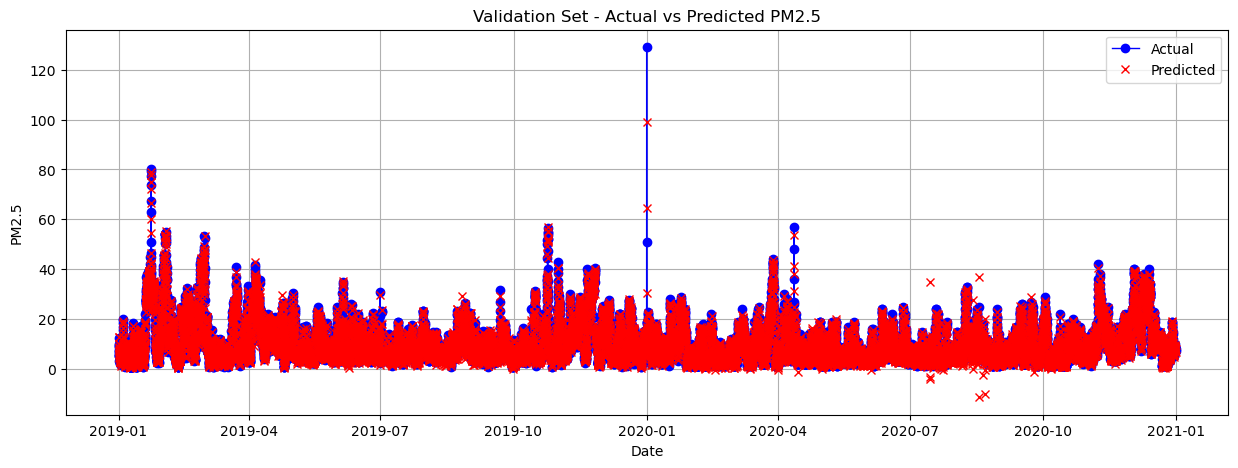

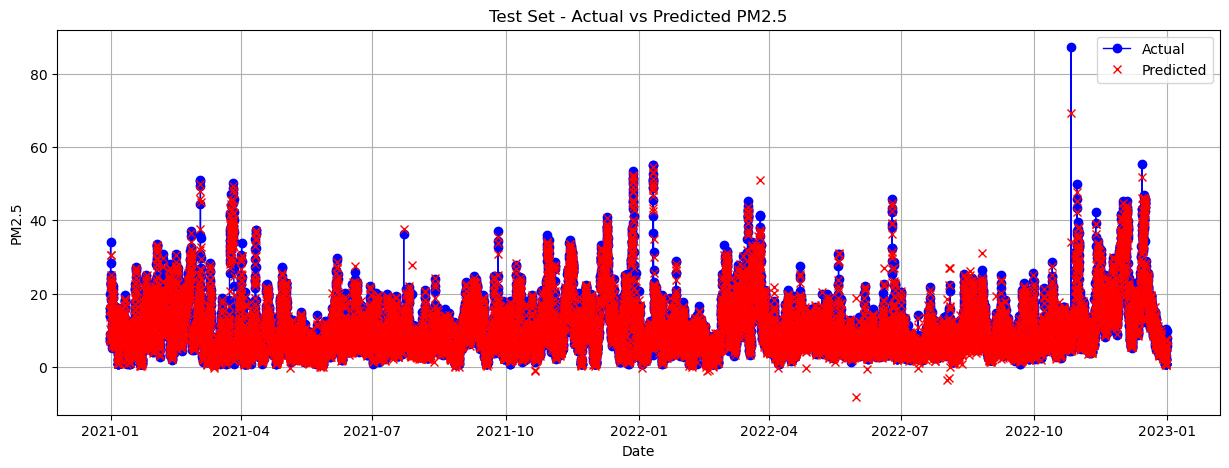

In [4]:
td.arimax_train_and_evolve(df)

# Exponential Smooting

Exponential Smoothing (including its variants like Holt-Winters) is univariate, meaning it forecasts based on the historical values of a single time series (e.g., PM2.5-Value) without considering additional features or external variables like other pollutants, etc.

## Holt-Linear Trend Method Exponential Smooting (Hourlity data)

The Holt Linear Trend Method, a form of Exponential Smoothing, is a time series forecasting technique that extends simple exponential smoothing to capture trends in data. Unlike simple exponential smoothing, which is ideal for data without a trend, the Holt method considers both the level (average value) and the trend (direction and rate of change) of a series. It applies two smoothing equations: one for the level and another for the trend. This dual approach allows the method to adjust its forecasts to both changing baselines and trends in the data, making it more flexible and accurate for forecasting series with trends. The method involves two key parameters: the smoothing constant for the level and the smoothing constant for the trend, which control how quickly the model responds to changes in the level and trend of the data, respectively. The Holt Linear Trend Method is widely used in various applications, such as inventory control, sales forecasting, and economic forecasting, due to its simplicity and effectiveness in handling linear trends.


In [ ]:
# hyperparamater tuning 
best_model, best_mse = td.optimize_exponential_smoothing(df)

Training set size: 52588
Validation set size: 17529
Test set size: 17531


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Error with configuration ('mul', 'add', 12, False): Input contains NaN, infinity or a value too large for dtype('float64').


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


# Model creation and Evolve

In [ ]:
td.expomnential_smooting_train_and_evolve(df)